In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [40]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'ADBE', 'PEP', 'BAC', 'WMT', 'PFE', 'JNJ', 'TSLA', 'MCD', 'KO', 'NVDA', 'TUPRS.IS', 'SISE.IS', 'FROTO.IS', 'EREGL.IS', 'MAVI.IS', 'TTRAK.IS']

In [41]:
import datetime

# Define data range
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

# Download data with auto_adjust=True
data= yf.download(tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), auto_adjust=True)

# Show first 5 rows (all columns)
print(data.head())

[*********************100%***********************]  20 of 20 completed


Price            Close                                                \
Ticker            AAPL        ADBE        AMZN        BAC   EREGL.IS   
Date                                                                   
2024-07-29  217.224121  536.609985  183.199997  40.107063  27.539700   
2024-07-30  217.781509  538.710022  181.710007  40.292522  27.688297   
2024-07-31  221.046234  551.650024  186.979996  39.345730  27.762594   
2024-08-01  217.343552  546.409973  184.070007  38.555103  28.356976   
2024-08-02  218.836563  526.169983  167.899994  36.681030  27.267275   

Price                                                                ...  \
Ticker       FROTO.IS       GOOGL         JNJ         KO    MAVI.IS  ...   
Date                                                                 ...   
2024-07-29  95.476006  168.712738  153.556824  64.931084  53.929005  ...   
2024-07-30  96.445801  169.469086  156.239410  65.756943  54.411377  ...   
2024-07-31  96.397308  170.713043  152.8692

In [42]:
returns = data['Close'].pct_change(fill_method=None).dropna()

print(returns.head())

Ticker          AAPL      ADBE      AMZN       BAC  EREGL.IS  FROTO.IS  \
Date                                                                     
2024-07-30  0.002566  0.003914 -0.008133  0.004624  0.005396  0.010157   
2024-07-31  0.014991  0.024020  0.029002 -0.023498  0.002683 -0.000503   
2024-08-01 -0.016751 -0.009499 -0.015563 -0.020094  0.021409 -0.007545   
2024-08-02  0.006869 -0.037042 -0.087847 -0.048608 -0.038428 -0.038520   
2024-08-05 -0.048167 -0.032024 -0.040977 -0.024747 -0.089918 -0.061676   

Ticker         GOOGL       JNJ        KO   MAVI.IS       MCD      MSFT  \
Date                                                                     
2024-07-30  0.004483  0.017470  0.012719  0.008945  0.019203 -0.008928   
2024-07-31  0.007340 -0.021571 -0.013889 -0.000887 -0.003903 -0.010806   
2024-08-01 -0.004547  0.018435  0.018280 -0.003549  0.012623 -0.002964   
2024-08-02 -0.024010  0.021025  0.020159 -0.025824  0.029544 -0.020666   
2024-08-05 -0.044462 -0.017607 -0.017

In [43]:
num_portfolios = 10000
results =np.zeros((3, num_portfolios))
weights_record = []

risk_free_rate = 0.05

# Set seed for monte carlo simulation to generate the exact same set of output on every run and to allow for consistency.
np.random.seed(24)


for i in range(num_portfolios):
  weights = np.random.random(len(tickers))
  weights /= np.sum(weights)
  weights_record.append(weights)

  portfolio_return = np.sum(returns.mean() * weights) * 252
  portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
  sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

  results[0, i] = portfolio_return
  results[1, i] = portfolio_stddev
  results[2, i] = sharpe_ratio

In [44]:
results_frame = pd.DataFrame(results.T, columns=['Return', 'Risk' , 'Sharpe'])
max_sharpe_idx = results_frame['Sharpe'].idxmax()

optimal_weights = weights_record[max_sharpe_idx]
optimal_portfolio = results_frame.loc[max_sharpe_idx]

# Print results
print("Optimal Portfolio (Highest Sharpe Ratio):")
for i in range(len(tickers)):
  print(f"{tickers[i]}: {optimal_weights[i]*100:.2f}%")

  print(f"\nExpected Annual Return: {optimal_portfolio['Return']*100:2f}%")
  print(f"Annual Risk (Std Dev): {optimal_portfolio['Risk']*100:.2f}%")
  print(f"Sharpe Ratio: {optimal_portfolio['Sharpe']:.2f}")

Optimal Portfolio (Highest Sharpe Ratio):
AAPL: 4.88%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
MSFT: 0.81%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
AMZN: 6.44%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
GOOGL: 5.64%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
ADBE: 5.56%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
PEP: 6.38%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
BAC: 0.29%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
WMT: 9.15%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
PFE: 1.75%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Ratio: 0.78
JNJ: 1.14%

Expected Annual Return: 18.290723%
Annual Risk (Std Dev): 17.15%
Sharpe Rati

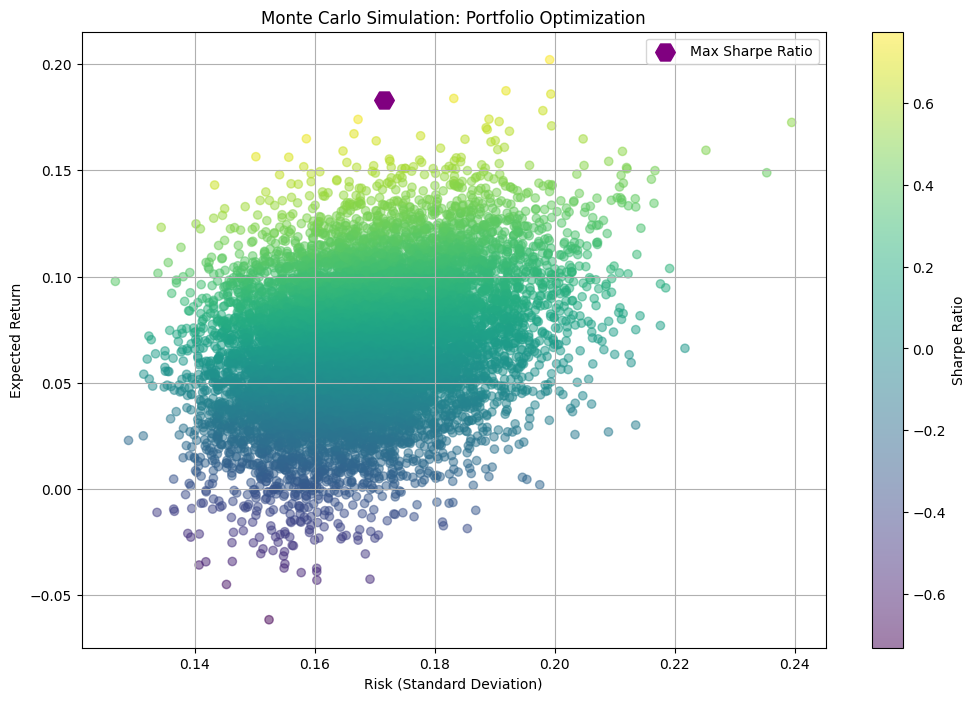


--- Max Sharpe Portfolio ---
Expected Return: 0.18
Volatility (Risk): 0.17
Sharpe Ratio: 0.78


In [45]:
plt.figure(figsize=(12,8))
plt.scatter(results_frame['Risk'], results_frame['Return'], c=results_frame['Sharpe'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio['Risk'], optimal_portfolio['Return'], color='purple', marker='H', s=200, label='Max Sharpe Ratio')
plt.title('Monte Carlo Simulation: Portfolio Optimization')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Max Sharpe Portfolio ---")
print(f"Expected Return: {optimal_portfolio['Return']:.2f}")
print(f"Volatility (Risk): {optimal_portfolio['Risk']:.2f}")
print(f"Sharpe Ratio: {optimal_portfolio['Sharpe']:.2f}")

In [46]:
portfolio_allocation = pd.DataFrame({
    'Ticker': tickers,
    'Weight (%)': [round(w * 100, 2 ) for w in optimal_weights]
})
print(portfolio_allocation)

      Ticker  Weight (%)
0       AAPL        4.88
1       MSFT        0.81
2       AMZN        6.44
3      GOOGL        5.64
4       ADBE        5.56
5        PEP        6.38
6        BAC        0.29
7        WMT        9.15
8        PFE        1.75
9        JNJ        1.14
10      TSLA        7.69
11       MCD       10.16
12        KO       10.57
13      NVDA        6.67
14  TUPRS.IS        0.54
15   SISE.IS        0.48
16  FROTO.IS        4.06
17  EREGL.IS        0.44
18   MAVI.IS        8.57
19  TTRAK.IS        8.77


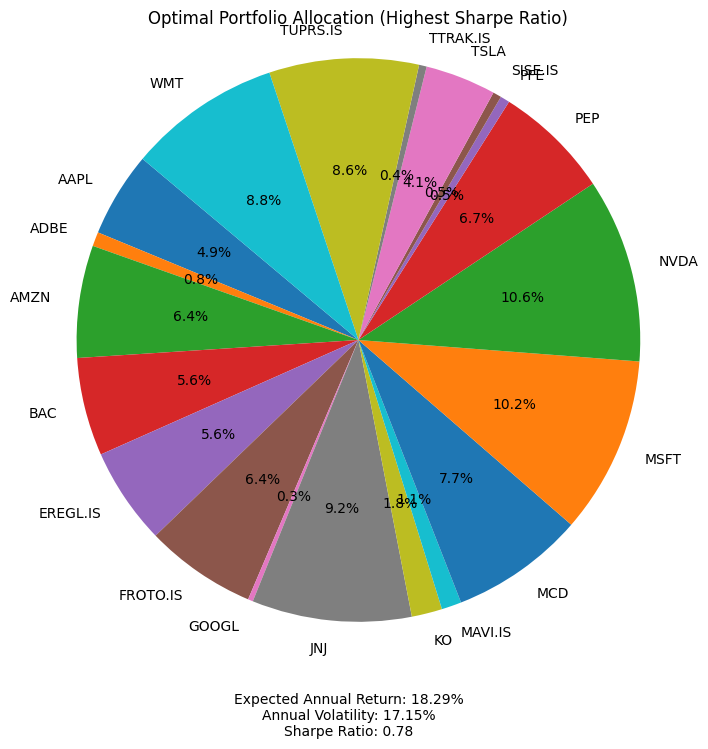

In [47]:
# Extract tickers from data
tickers = list(data['Close'].columns)
filtered_tickers = [t for t in tickers if t in data['Close'].columns]

# Create optimal weights Series
optimal_weights_series = pd.Series(optimal_weights[:len(filtered_tickers)], index=filtered_tickers)

# Filter price data
data_filtered = data['Close'][filtered_tickers]

# Calculate annual performance metrics if not already calculated
daily_returns = data_filtered.pct_change(fill_method=None).dropna()
weights = optimal_weights_series.values
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

expected_annual_return = np.dot(weights, mean_returns) * 252
annual_volatility = np.sqrt(weights @ cov_matrix @ weights) * np.sqrt(252)
sharpe_ratio = (expected_annual_return - 0.05) / annual_volatility

plt.figure(figsize=(8, 8))
plt.pie(optimal_weights, labels=tickers, autopct='%1.1f%%', startangle=140)
plt.title('Optimal Portfolio Allocation (Highest Sharpe Ratio)')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.figtext(0.5, 0.0,
            f"Expected Annual Return: {expected_annual_return:.2%}\n"
            f"Annual Volatility: {annual_volatility:.2%}\n"
            f"Sharpe Ratio: {sharpe_ratio:.2f}",
            ha='center', fontsize=10)
plt.show()

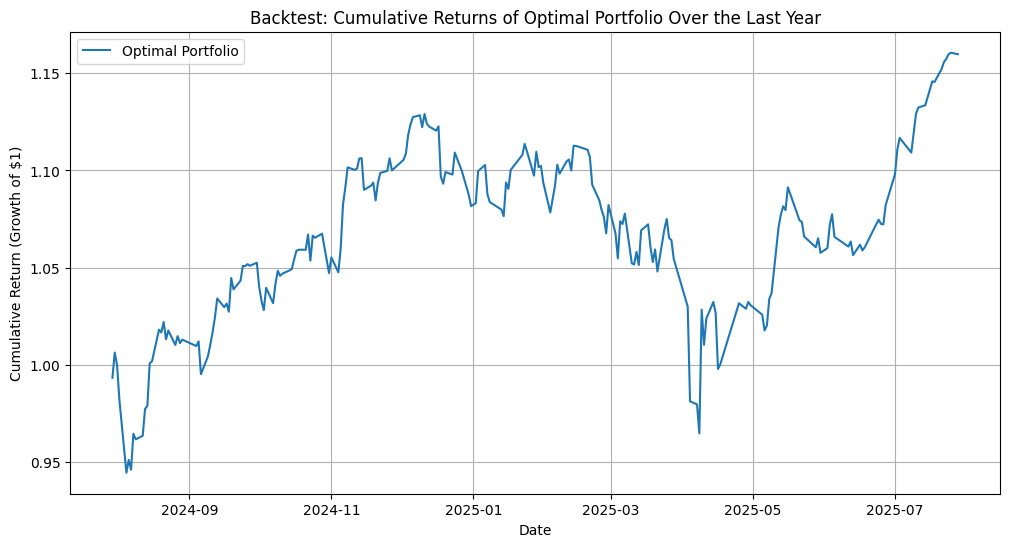


Final Cumulative Return over the period: 15.98%


In [48]:
# Backtesting the Optimal Portfolio Performance Over the Last Year

# 1. Calculate daily portfolio returns by multiplying asset returns with optimal weights
portfolio_daily_returns = daily_returns.dot(optimal_weights_series)

# 2. Calculate cumulative returns over the period to see growth of $1 invested
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# 3. Calculate final cumulative return
final_cumulative_return = cumulative_returns.iloc[-1] - 1  # (X - 1) = % total return
total_return_percent = final_cumulative_return * 100

# 4. Plot cumulative returns to visualize portfolio growth
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label='Optimal Portfolio')
plt.title('Backtest: Cumulative Returns of Optimal Portfolio Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Growth of $1)')
plt.legend()
plt.grid(True)
plt.show()

# 5. print the final return numerically
print(f"\nFinal Cumulative Return over the period: {total_return_percent:.2f}%")

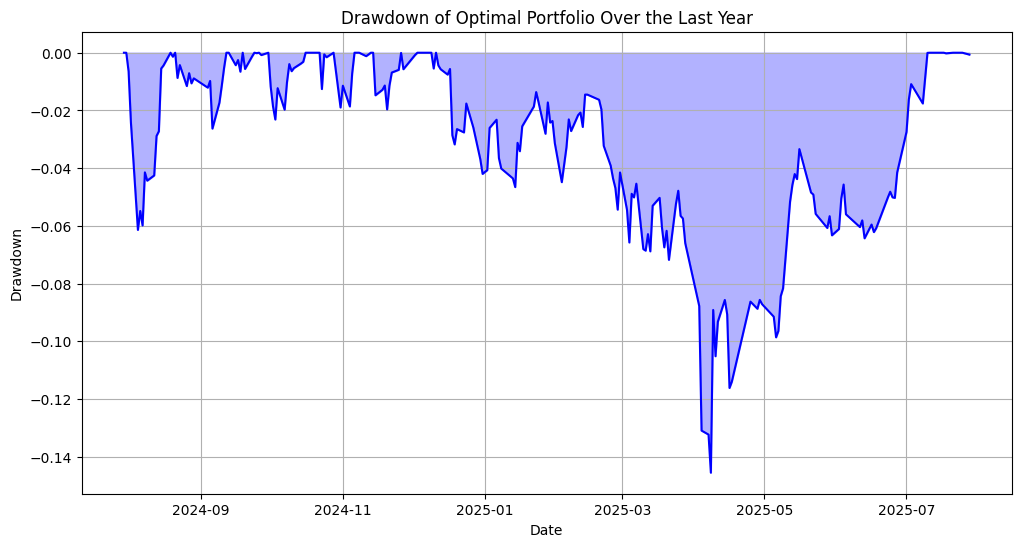


Maximum Drawdown over the period: -14.55%


In [49]:
# Drawdown Calculation and Plotting

# Calculate running maximum of cumulative returns
running_max = cumulative_returns.cummax()

# Calculate drawdown: percentage drop from running max
drawdown = (cumulative_returns - running_max) / running_max

# Calculate Max Drawdown
max_drawdown = drawdown.min()

# Plot drawdown
plt.figure(figsize=(12,6))
plt.plot(drawdown, color='blue')
plt.fill_between(drawdown.index, drawdown, 0, color='blue', alpha=0.3)
plt.title('Drawdown of Optimal Portfolio Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

# print drawdown result
print(f"\nMaximum Drawdown over the period: {max_drawdown:.2%}")

[*********************100%***********************]  1 of 1 completed


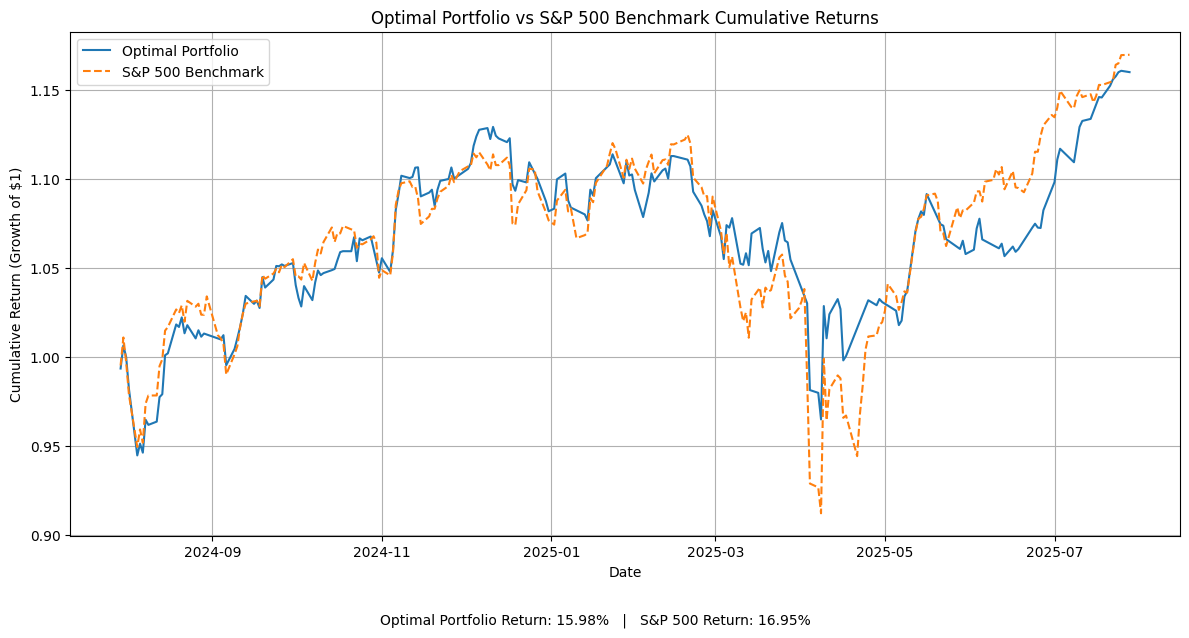


Final Cumulative Returns:
Optimal Portfolio: 15.98%
S&P 500 Benchmark: 16.95%


In [50]:
# Download benchmark (S&P 500) data
benchmark_ticker = '^GSPC'
benchmark_data = yf.download(benchmark_ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), auto_adjust=True)

# Calculate benchmark cumulative returns
benchmark_returns = benchmark_data['Close'].pct_change(fill_method=None).dropna()
benchmark_cum_returns = (1 + benchmark_returns).cumprod()

# Calculate portfolio cumulative returns

# Final cumulative return values
if isinstance(cumulative_returns, pd.DataFrame):
    if 'Portfolio' in cumulative_returns.columns:
        final_optimal = cumulative_returns['Portfolio'].iloc[-1] - 1
    else:
        final_optimal = cumulative_returns.iloc[-1].mean() - 1
else:
    final_optimal = cumulative_returns.iloc[-1] - 1

final_benchmark = benchmark_cum_returns.iloc[-1] - 1

# Convert to float and then to percentage safely
if isinstance(final_optimal, pd.Series):
    optimal_pct = float(final_optimal.iloc[0]) * 100
else:
    optimal_pct = float(final_optimal) * 100

if isinstance(final_benchmark, pd.Series):
    benchmark_pct = float(final_benchmark.iloc[0]) * 100
else:
    benchmark_pct = float(final_benchmark) * 100

# Plot portfolio vs benchmark
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label='Optimal Portfolio')
plt.plot(benchmark_cum_returns, label='S&P 500 Benchmark', linestyle='--')
plt.title('Optimal Portfolio vs S&P 500 Benchmark Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Growth of $1)')
plt.figtext(0.5, -0.05,
            f"Optimal Portfolio Return: {optimal_pct:.2f}%   |   S&P 500 Return: {benchmark_pct:.2f}%",
            ha='center', fontsize=10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print numeric results
print(f"\nFinal Cumulative Returns:")
print(f"Optimal Portfolio: {optimal_pct:.2f}%")
print(f"S&P 500 Benchmark: {benchmark_pct:.2f}%")

Value at Risk (95% confidence): -1.52%
Conditional Value at Risk (CVaR - 95% confidence): -2.38%


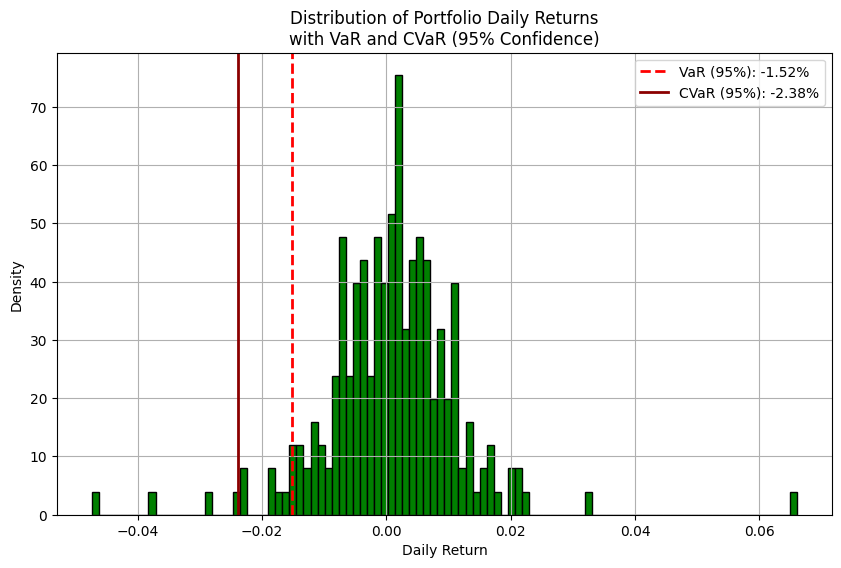

In [51]:
# Value at Risk (VaR) and Conditional Value at Risk (CVaR) for the optimal portfolio

import scipy.stats as stats

# Calculate portfolio daily returns using optimal weights
daily_returns = data_filtered.pct_change(fill_method=None).dropna()
portfolio_returns = daily_returns @ optimal_weights_series.values

# Define confidence level
confidence_level = 0.95

# Calculate historical VaR
var_95 = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

# Calculate CVaR (expected shortfall) for 95% confidence level
cvar_95 = portfolio_returns[portfolio_returns <= var_95].mean()

# Print the risk metrics
print(f"Value at Risk (95% confidence): {var_95:.2%}")
print(f"Conditional Value at Risk (CVaR - 95% confidence): {cvar_95:.2%}")

# Plot distribution with VaR and CVaR
plt.figure(figsize=(10,6))
plt.hist(portfolio_returns, bins=100, color='green', edgecolor='black', density=True)
plt.axvline(var_95, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {var_95:.2%}')
plt.axvline(cvar_95, color='darkred', linestyle='-', linewidth=2, label=f'CVaR (95%): {cvar_95:.2%}')
plt.title('Distribution of Portfolio Daily Returns\nwith VaR and CVaR (95% Confidence)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
min_risk_idx = results_frame['Risk'].idxmin()

min_risk_weights = weights_record[min_risk_idx]
min_risk_portfolio = results_frame.loc[min_risk_idx]

#Print results
print("Minimum Risk Portfolio:")
for i in range(len(tickers)):
  print(f"{tickers[i]}: {min_risk_weights[i]*100:2f}%")

  print(f"\nExpected Annual Return: {min_risk_portfolio['Return']*100:2f}%")
  print(f"Annual Risk (Std Dev): {min_risk_portfolio['Risk']*100:.2f}%")
  print(f"Sharpe Ratio: {min_risk_portfolio['Sharpe']:.2f}")

Minimum Risk Portfolio:
AAPL: 3.642306%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
ADBE: 0.657661%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
AMZN: 0.443682%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
BAC: 1.890509%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
EREGL.IS: 5.406519%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
FROTO.IS: 0.281274%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
GOOGL: 6.901473%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
JNJ: 11.762463%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
KO: 11.868966%

Expected Annual Return: 9.770878%
Annual Risk (Std Dev): 12.67%
Sharpe Ratio: 0.38
MAVI.IS: 0.710886%

Expected Annual Return: 9.770878%
Annual Risk (St

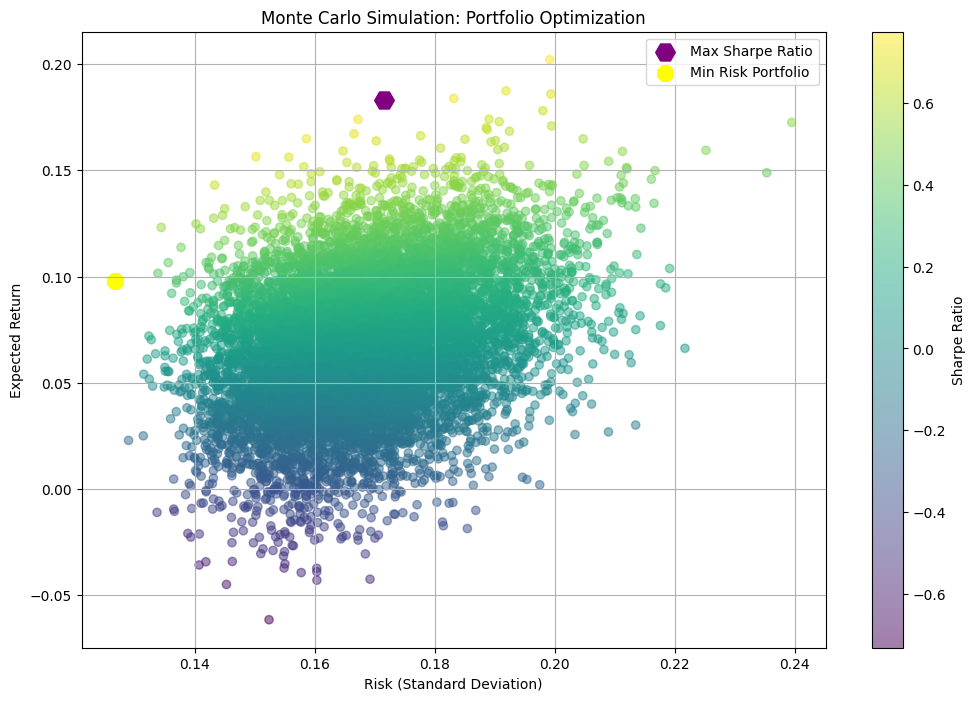


--- Max Sharpe Portfolio ---
Expected Return: 0.18
Volatility (Risk): 0.17
Sharpe Ratio: 0.78

--- Minimum Risk Portfolio ---
Expected Return: 0.10
Volatility (Risk): 0.13
Sharpe Ratio: 0.38


In [53]:
plt.figure(figsize=(12,8))
plt.scatter(results_frame['Risk'], results_frame['Return'], c=results_frame['Sharpe'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio['Risk'], optimal_portfolio['Return'], color='purple', marker='H', s=200, label='Max Sharpe Ratio')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='yellow', marker='8', s=150, label='Min Risk Portfolio')
plt.title('Monte Carlo Simulation: Portfolio Optimization')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Max Sharpe Portfolio ---")
print(f"Expected Return: {optimal_portfolio['Return']:.2f}")
print(f"Volatility (Risk): {optimal_portfolio['Risk']:.2f}")
print(f"Sharpe Ratio: {optimal_portfolio['Sharpe']:.2f}")

print("\n--- Minimum Risk Portfolio ---")
print(f"Expected Return: {min_risk_portfolio['Return']:.2f}")
print(f"Volatility (Risk): {min_risk_portfolio['Risk']:.2f}")
print(f"Sharpe Ratio: {min_risk_portfolio['Sharpe']:.2f}")

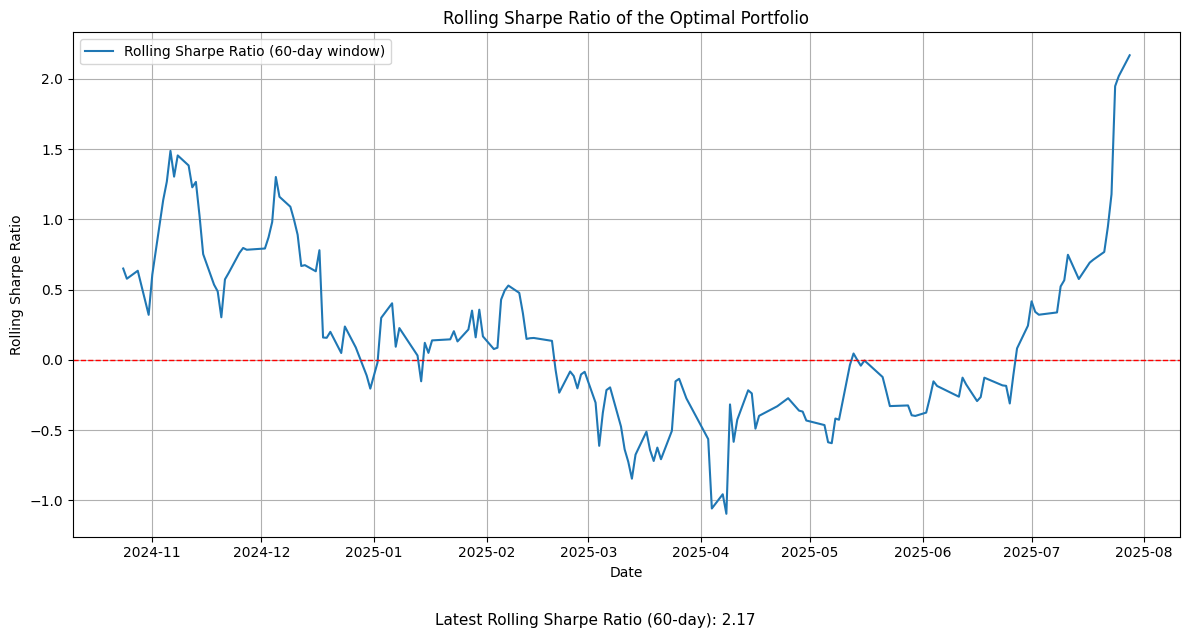

In [54]:
# Rolling Sharpe Ratio Calculation and Plot

window = 60  # rolling window size (days)

# Calculate daily excess returns by subtracting daily risk-free rate
daily_risk_free_rate = risk_free_rate / 252
excess_returns = returns - daily_risk_free_rate

# Calculate rolling mean and rolling std dev of excess returns
rolling_mean = excess_returns.rolling(window=window).mean()
rolling_std = excess_returns.rolling(window=window).std()

# Calculate rolling Sharpe ratio
rolling_sharpe = rolling_mean / rolling_std * np.sqrt(252)

# Calculate portfolio rolling Sharpe ratio using optimal weights
rolling_sharpe_portfolio = rolling_sharpe.dot(optimal_weights)

# Get the latest rolling Sharpe ratio value
final_value = rolling_sharpe_portfolio.iloc[-1]

# Plot rolling Sharpe Ratio for the optimal portfolio
plt.figure(figsize=(12,6))
plt.plot(rolling_sharpe.index, rolling_sharpe.dot(optimal_weights), label='Rolling Sharpe Ratio (60-day window)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Rolling Sharpe Ratio of the Optimal Portfolio')
plt.xlabel('Date')
plt.ylabel('Rolling Sharpe Ratio')
plt.legend()
plt.grid(True)

# Add the final value below the plot
plt.figtext(0.5, -0.05, f"Latest Rolling Sharpe Ratio (60-day): {final_value:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

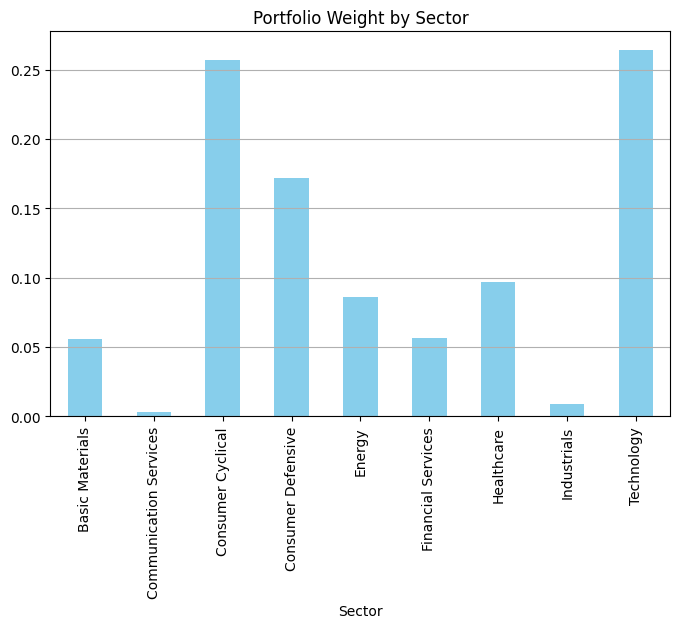

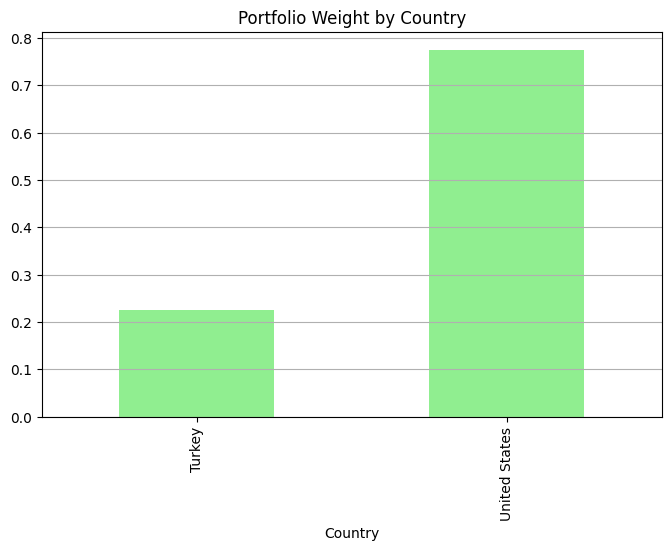


--- Sector Weights (% of Portfolio) ---
Basic Materials: 5.56%
Communication Services: 0.29%
Consumer Cyclical: 25.72%
Consumer Defensive: 17.19%
Energy: 8.57%
Financial Services: 5.64%
Healthcare: 9.69%
Industrials: 0.92%
Technology: 26.42%

--- Country Weights (% of Portfolio) ---
Turkey: 22.58%
United States: 77.42%


In [55]:
# Minimal Sector & Country Breakdown for Optimal Portfolio

def get_info_simple(ticker):
    try:
        info = yf.Ticker(ticker).info
        return info.get('sector', 'Unknown'), info.get('country', 'Unknown')
    except:
        return 'Unknown', 'Unknown'

sector_list = []
country_list = []

for t in tickers:
    s, c = get_info_simple(t)
    sector_list.append(s)
    country_list.append(c)

portfolio_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': optimal_weights,
    'Sector': sector_list,
    'Country': country_list
})

portfolio_df = portfolio_df[portfolio_df['Weight'] > 0.001]

sector_weights = portfolio_df.groupby('Sector')['Weight'].sum()
country_weights = portfolio_df.groupby('Country')['Weight'].sum()

sector_weights.plot(kind='bar', figsize=(8,5), color='skyblue', title='Portfolio Weight by Sector').grid(axis='y')
plt.show()

country_weights.plot(kind='bar', figsize=(8,5), color='lightgreen', title='Portfolio Weight by Country').grid(axis='y')
plt.show()

# Print sector weights numerically
print("\n--- Sector Weights (% of Portfolio) ---")
for sector, weight in sector_weights.items():
    print(f"{sector}: {weight * 100:.2f}%")

# Print country weights numerically
print("\n--- Country Weights (% of Portfolio) ---")
for country, weight in country_weights.items():
    print(f"{country}: {weight * 100:.2f}%")

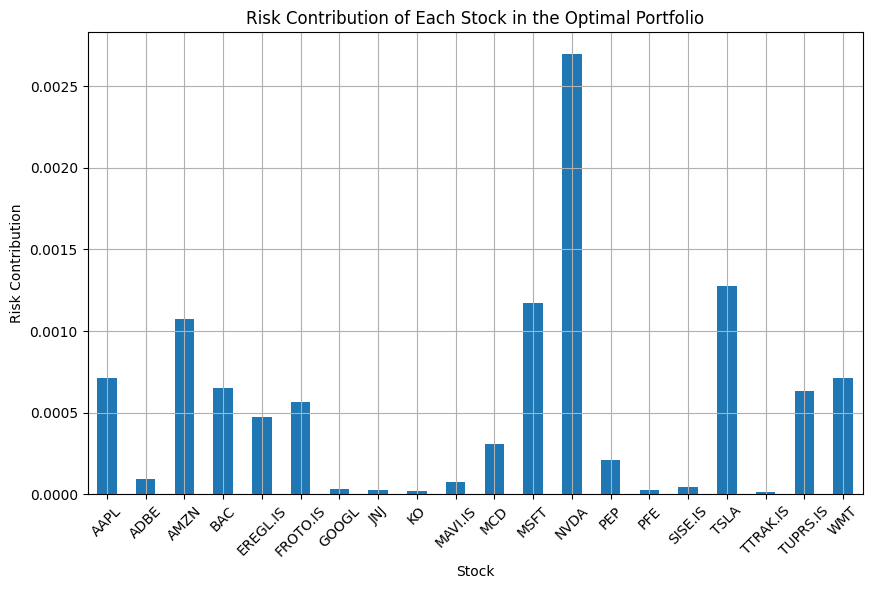


--- Risk Contribution (% of Total Portfolio Risk) ---
AAPL: 0.07%
ADBE: 0.01%
AMZN: 0.11%
BAC: 0.06%
EREGL.IS: 0.05%
FROTO.IS: 0.06%
GOOGL: 0.00%
JNJ: 0.00%
KO: 0.00%
MAVI.IS: 0.01%
MCD: 0.03%
MSFT: 0.12%
NVDA: 0.27%
PEP: 0.02%
PFE: 0.00%
SISE.IS: 0.00%
TSLA: 0.13%
TTRAK.IS: 0.00%
TUPRS.IS: 0.06%
WMT: 0.07%


In [56]:
# get the list of tickers from the 'Close' columns in the data
tickers = list(data['Close'].columns)

# filter tickets to keep only those present in data['Close'].columns (this won't return an empty list anymore)
filtered_tickers = [t for t in tickers if t in data['Close'].columns]

# Error check
if len(filtered_tickers) == 0:
    raise ValueError("No tickers matched!")

# continue with the rest of code
optimal_weights_series = pd.Series(optimal_weights[:len(filtered_tickers)], index=filtered_tickers)

# filter the data
data_filtered = data['Close'][filtered_tickers]

#calculate  the covariance matrix of returns
cov_matrix = data_filtered.pct_change(fill_method=None).dropna().cov()

# define a function to calculate risk contibutions of each asset
def calculate_risk_contribution(weights, cov_matrix):
    portfolio_variance = weights @ cov_matrix @ weights
    marginal_contrib = cov_matrix @ weights
    risk_contrib = weights * marginal_contrib / np.sqrt(portfolio_variance)
    return risk_contrib

# calculate the covariance matrix of returns
risk_contrib = calculate_risk_contribution(optimal_weights_series.values, cov_matrix.values)

# convert the risk contibutions using the function
risk_contrib_series = pd.Series(risk_contrib, index=filtered_tickers)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
risk_contrib_series.plot(kind='bar')
plt.title('Risk Contribution of Each Stock in the Optimal Portfolio')
plt.xlabel('Stock')
plt.ylabel('Risk Contribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("\n--- Risk Contribution (% of Total Portfolio Risk) ---")
for ticker, contribution in risk_contrib_series.items():
    print(f"{ticker}: {contribution * 100:.2f}%")

In [57]:
import numpy as np

# 1. Calculate daily returns of the portfolio assets (data_filtered contains daily price data)
daily_returns = data_filtered.pct_change(fill_method=None).dropna()

# 2. Calculate expected daily portfolio return (weighted average of individual asset returns)
expected_daily_return = np.dot(optimal_weights_series.values, daily_returns.mean())

# 3. Calculate daily portfolio volatility (standard deviation)
portfolio_variance = optimal_weights_series.values @ daily_returns.cov() @ optimal_weights_series.values
portfolio_volatility = np.sqrt(portfolio_variance)

# 4. Annualize return and volatility assuming 252 trading days per year
trading_days = 252
expected_annual_return = expected_daily_return * trading_days
annual_volatility = portfolio_volatility * np.sqrt(trading_days)

# 5. Define risk-free rate (example: 5% annual risk-free rate)
risk_free_rate = 0.05

# 6. Calculate annualized Sharpe ratio
sharpe_ratio = (expected_annual_return - risk_free_rate) / annual_volatility

# 7. Print the results
print(f"Expected Annual Return: {expected_annual_return:.2%}")
print(f"Annual Volatility (Risk): {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Expected Annual Return: 18.29%
Annual Volatility (Risk): 17.15%
Sharpe Ratio: 0.78
